# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-1**<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Tarea 01: Herramientas Computacionales para Ciencia de Datos </center></h1>

## Instrucciones

- Fecha de publicación: jueves 17 de agosto de 2023.

- Fecha de límite de entrega: lunes 4 de septiembre de 2023, a las 23:59.

- Vía de entrega: Módulo de Tareas en Canvas.

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.

- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.

- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.

- Se sugiere hacer consultas y comentarios sobre la Tarea a traves del canal de Tareas en el Foro del curso en Canvas.


## 1. Objetivos de la Tarea

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidade de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la lectura y exploración de datos. 

En los ejercicios a desarrollar a continuación, usted deberá leer, inspeccionar, manipular y graficar conjuntos de datos en distintos formatos, de manera de responder las preguntas de cada parte de la Tarea.

### 1.2 Pregunta de ciencia de datos

Como comentamos en clases, el objetivo final de las herramientas en ciencia de datos es poder entender mejor un fenómeno o contestar alguna pregunta relevante. En este caso, queremos entender mejor cómo las cuarentenas impuestas en la Ciudad de Nueva York con motivo de la Pandemia de COVID 19, redujeron la movilidad de las personas en la ciudad. En esa ciudad, entre el 17 de marzo de 2020 y el 14 de mayo del mismo año se implementó una cuarentena, y queremos ver el impacto que tuvo en el uso de algunos sistemas de transporte.

## 2. Datos

Para esta tarea estaremos aprovechando el repositorio abierto de datos de la ciudad de Nueva York. En particular, usaremos la base de datos de viajes en los Taxis Amarillos en la ciudad (Yellow Taxi Trip Records), creada por la Comisión de Taxis y Limosinas de NYC: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

### 2.1 Nueva librería

Los datos de esta base, están en formato PARQUET. El formato PARQUET, que es open-source desarrollado por Apache, es un formato eficiente para almacenar y leer bases de datos de gran tamaño. Para poder leer este formato desde Python, deberán instalar una nueva librería llamada ' `pyarrow` '. Para instalarla use el comando:

<code>> conda install pyarrow</code>

Si desea usar sólo Pandas también se pueden leer estos archivos usando la función ' `pd.read_parquet(filename)` '.

### 2.2 Descargar datos

Para esta tarea deberá descargar todos los meses de datos de 2019 y 2020 de los viajes en Taxi Amarillo (Yellow Taxi Trip Records). Esto resultará en 24 archivos PARQUET, uno por cada mes de esos dos años de datos.

### 2.3 Librerias a usar

Para esta tarea recomendamos al menos usar las librerías indicadas en la siguiente celda del Notebook. Puede agregar otras si lo estima conveniente para responder de mejor forma las preguntas de la Tarea.

In [1]:
# Importación de librerías: importe las siguientes librerías, usando alias comunes
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import pyarrow as pa
import gc
gc.enable()

In [2]:
# Constantes 
YEARS = ["2019", "2020"]
SEMESTER = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
PATH_FILE = "data/{year}/yellow_tripdata_{year}-{month}.parquet"


## 3. Desarrollo

Para cada una de las siguientes preguntas o actividades incluya una o más celdas de código y markdown con las respuestas o comentarios necesarios para contestar la pregunta o lograr la actividad. Agregue sus celdas a continuación de cada pregunta para que el Notebook quede ordenado.

En el caso de gráficos, figuras o tablas, asegúrese que todas tengan título, etiquetas en los ejes o haya claridad de los contenidos.

### 3.1 Base de datos unificada (0.5 puntos)

Cargue los datos descargados en el punto 2.2 y genere un único DataFrame con todos ellos para cada año (uno para 2019 y uno para 2020). Use la función '`pd.concat()`' para unir los DataFrame de cada mes. 

Posteriormente, almacene cada DataFrame en un único archivo. Puede ser un archivo de tipo "pickle" o tipo "parquet". Si lo almacena en un tipo "pickle", puede encontrar información de este tipo de archivos en el siguiente enlace: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_pickle.html. Si decide almacenarlo en formato "parquet", use la librería '`pyarrow`' para hacerlo, con las funciones '`pa.Table.from_pandas()`' y '`pq.write_table()`'.

---

Conteste las siguientes preguntas:
- ¿Cuanto espacio en disco usan todos los archivos separados que bajó para 2019 y para 2020?

##### Para el 2019 todos los archivos pesan un total de 1,15gb y para el 2020 unos 357mb.

- ¿Cuánto espacio en disco usa cada uno de los dos archivos creados con los datos agrupados?

##### El 2019 unificado en un unico archivo pesa 1,81gb y el 2020 unificado en un unico archivo pesa 525mb.



El siguiente codigo crea un archivo con la base unificada por año, en formato parquet.

In [ ]:
for year in YEARS:
    pd.concat([pd.read_parquet(PATH_FILE.format(year=year, month=month), engine="pyarrow") for month in SEMESTER]).to_parquet(f"data/{year}/{year}.parquet")
    print("Save parquet file in data/{year}/{year}.parquet".format(year=year))
    


Leemos los archivos parquet para cada año y creamos un dataframe con todos los datos de cada año.


In [3]:
# Para usar menos recursos, vamos a usar solamente las columnas utiles

df_2019 = pd.read_parquet("data/2019/2019.parquet", engine="pyarrow", columns=[
 'tpep_pickup_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'total_amount'])
df_2020 = pd.read_parquet("data/2020/2020.parquet", engine="pyarrow", columns=[
 'tpep_pickup_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'total_amount'])

In [6]:
df_2020.head(25)

,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,total_amount
0,2020-01-01 00:28:15,1.0,1.20,1.0,238,239,11.27
1,2020-01-01 00:35:39,1.0,1.20,1.0,239,238,12.30
2,2020-01-01 00:47:41,1.0,0.60,1.0,238,238,10.80
3,2020-01-01 00:55:23,1.0,0.80,1.0,238,151,8.16
4,2020-01-01 00:01:58,1.0,0.00,1.0,193,193,4.80
5,2020-01-01 00:09:44,1.0,0.03,1.0,7,193,3.80
6,2020-01-01 00:39:25,1.0,0.00,1.0,193,193,3.81
7,2019-12-18 15:27:49,1.0,0.00,5.0,193,193,2.81
8,2019-12-18 15:30:35,4.0,0.00,1.0,193,193,6.30
9,2020-01-01 00:29:01,2.0,0.70,1.0,246,48,14.15


Notamos que en el dataframe del 2019 hay datos erroneos, por lo que limpiaremos los datos para asegurarnos que sean del año 2019, tambien lo haremos para el 2020.

In [7]:
df_2019 = df_2019[df_2019["tpep_pickup_datetime"].dt.year == 2019]
df_2020 = df_2020[df_2020["tpep_pickup_datetime"].dt.year == 2020]

In [8]:
df_2019

,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,total_amount
0,2019-01-01 00:46:40,1.0,1.50,1.0,151,239,9.95
1,2019-01-01 00:59:47,1.0,2.60,1.0,239,246,16.30
7,2019-01-01 00:21:28,1.0,1.30,1.0,163,229,9.05
8,2019-01-01 00:32:01,1.0,3.70,1.0,229,7,18.50
9,2019-01-01 00:57:32,2.0,2.10,1.0,141,234,13.00
...,...,...,...,...,...,...,...
6896312,2019-12-31 23:56:29,NaN,2.82,NaN,143,141,22.00
6896313,2019-12-31 23:11:53,NaN,3.75,NaN,148,246,25.50
6896314,2019-12-31 23:57:21,NaN,6.46,NaN,197,205,37.91
6896315,2019-12-31 23:37:29,NaN,5.66,NaN,90,74,39.50


In [9]:
df_2020

,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,total_amount
0,2020-01-01 00:28:15,1.0,1.20,1.0,238,239,11.27
1,2020-01-01 00:35:39,1.0,1.20,1.0,239,238,12.30
2,2020-01-01 00:47:41,1.0,0.60,1.0,238,238,10.80
3,2020-01-01 00:55:23,1.0,0.80,1.0,238,151,8.16
4,2020-01-01 00:01:58,1.0,0.00,1.0,193,193,4.80
...,...,...,...,...,...,...,...
1461893,2020-12-31 23:44:35,NaN,9.22,NaN,143,20,43.95
1461894,2020-12-31 23:41:36,NaN,4.79,NaN,4,262,20.17
1461895,2020-12-31 23:01:17,NaN,28.00,NaN,210,78,78.98
1461896,2020-12-31 23:31:29,NaN,7.08,NaN,148,129,39.50


### 3.2 Viajes anuales (1 punto)

Inspeccionando los datos de las bases bajadas conteste las siguientes preguntas:

**a)** ¿Cuantos viajes se realizaronen total para 2019 y 2020? (0.5 puntos)

In [10]:
print(f"Para el 2019 se realizaron en total {len(df_2019)} de viajes y para el 2020 unos {len(df_2020)} viajes")

Para el 2019 se realizaron en total 84597002 de viajes y para el 2020 unos 24648812 viajes


**b)** ¿En qué porcentaje disminuyeron los viajes en 2020 con respecto a 2019? (0.5 puntos)

In [11]:
print(f"Los viajeres disminuyeron un {round(100 - (len(df_2020) * 100) / len(df_2019), 2)}% respecto al 2019")

Los viajeres disminuyeron un 70.86% respecto al 2019


### 3.3 Analisis de los viajes (1 punto)

**a)** Elija un mes y un año. ¿Cuál es el viaje más largo y más corto realizado ese mes? ¿Son razonables esos valores? (0.5 puntos)

In [12]:
df_seleccionado = df_2019[df_2019["tpep_pickup_datetime"].dt.month == 1]
# Buscar el valor maximo
df_seleccionado[df_seleccionado["trip_distance"].max() == df_seleccionado["trip_distance"]]


,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,total_amount
6074091,2019-01-25 21:56:39,1.0,831.8,1.0,140,239,11.76


El viaje mas largo realizado fue por 831.8 millas y del cual se pago 11.76 dolares, lo cual no es razonable.

In [13]:
df_seleccionado[df_seleccionado["trip_distance"].min() == df_seleccionado["trip_distance"]]


,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,total_amount
28,2019-01-01 00:32:59,3.0,0.0,1.0,237,264,7.80
459,2019-01-01 00:42:45,1.0,0.0,1.0,161,161,4.30
681,2019-01-01 00:39:07,1.0,0.0,1.0,142,264,3.80
845,2019-01-01 00:41:58,1.0,0.0,1.0,161,161,4.80
947,2019-01-01 00:30:57,2.0,0.0,1.0,262,262,11.80
...,...,...,...,...,...,...,...
19658,2019-01-30 05:22:13,1.0,0.0,1.0,264,193,0.00
1777184,2019-01-20 11:26:11,1.0,0.0,1.0,264,264,2.30
355339,2019-01-28 11:06:18,1.0,0.0,5.0,193,193,2.76
355340,2019-01-28 11:24:44,1.0,0.0,5.0,193,193,0.01


Aqui encontramos 55.000 viajes con distancias iguales a 0 millas, lo cual tampoco tiene sentido. Incluso hay viajes que tienen un pago por 0 dolares, lo cual no es razonable.

**b)** Limpie los datos del mes seleccionado para dejar sólo aquellos que tienen alguna distancia recorrida y al menos un pasajero. Con esta base filtrada, ¿Cuál es el viaje más largo y más corto realizado ese mes? ¿Son razonables esos nuevos valores? (0.5 puntos)

In [19]:
df_seleccionado = df_seleccionado.loc[(df_seleccionado["passenger_count"] > 0) & (df_seleccionado["trip_distance"] > 0)]
df_seleccionado[df_seleccionado["trip_distance"].max() == df_seleccionado["trip_distance"]]


,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,total_amount
6074091,2019-01-25 21:56:39,1.0,831.8,1.0,140,239,11.76


En el caso del maximo valor aun no es un valor razonable, debido que por  831 millas se pagaron unos 11.76 usd, lo cual es imposible.

In [25]:
df_seleccionado.loc[(df_seleccionado["trip_distance"].min() == df_seleccionado["trip_distance"])].max()

tpep_pickup_datetime    2019-01-31 23:59:48
passenger_count                         8.0
trip_distance                          0.01
RatecodeID                              5.0
PULocationID                            265
DOLocationID                            265
total_amount                          415.3
dtype: object

Aqui encontramos que hay un viaje que tiene una distancia de 0.01 millas y se cobra un valor de 415 usd, lo cual no es razonable. Incluso existen valores con una distancia de 0.01 millas y un cobro por valores menores a 0 dolares, lo cual no existe.

### 3.4 Análisis de pasajeros (2 puntos)

El lugar más importante en términos de tomar y dejar pasajeros en NYC es el aeropuerto internacional JFK. Este se encuentra la zona con el ID 132 como vimos en clases.

<img style="width: 400px" src="https://www.nyc.gov/assets/tlc/images/content/pages/about/taxi_zone_map_queens.jpg">


**a)** ¿Cuál es el total de pasajeros tomados en la zona 132 en abril de 2019? (0.5 puntos)

In [26]:
abril_2019 = df_2019.loc[(df_2019["PULocationID"] == 132) & (df_2019["tpep_pickup_datetime"].dt.month == 4)]["passenger_count"].sum()
print(f"El total de pasajeros en 2019/04 en la zona 132 es de: {abril_2019}")

El total de pasajeros en 2019/04 en la zona 132 es de: 375221.0


**b)** ¿Cuál es el total de pasajeros tomados en la zona 132 en abril de 2020? (0.5 puntos)

In [27]:
abril_2020 = df_2020.loc[(df_2020["PULocationID"] == 132) & (df_2020["tpep_pickup_datetime"].dt.month == 4)]["passenger_count"].sum()
print(f"El total de pasajeros en 2020/04 en la zona 132 es de : {abril_2020}")

El total de pasajeros en 2020/04 en la zona 132 es de : 2052.0


In [28]:
# Filtramos por zona y por viajes que tengan al menos un pasajero

id_132_2019 = df_2019.loc[(df_2019["PULocationID"] == 132) & (df_2019["passenger_count"] > 0)]
id_132_2020 = df_2020.loc[(df_2020["PULocationID"] == 132) & (df_2020["passenger_count"] > 0)]

**c)** Genere un DataFrame que tenga los pasajeros totales tomados en la zona 132 por día para 2019 y otro para 2020. Asegúrese que las fechas estén en el rango correcto para cada año pues algunos de los archivos tienen errores de fechas.. (0.5 puntos)

In [240]:
# Los datos ya se encuentran limpiados por fecha
gby_2019 = id_132_2019.groupby(id_132_2019["tpep_pickup_datetime"].dt.day)["passenger_count"].sum()
gby_2020 = id_132_2020.groupby(id_132_2020["tpep_pickup_datetime"].dt.day)["passenger_count"].sum()

**d)** Grafique ambas series en el mismo gráfico para poder comparar las fechas entre un año y otro. Preocúpese de ponerle etiquetas al gráfico para identificar cada serie y una leyenda donde se muestre cada una. (0.5 puntos)

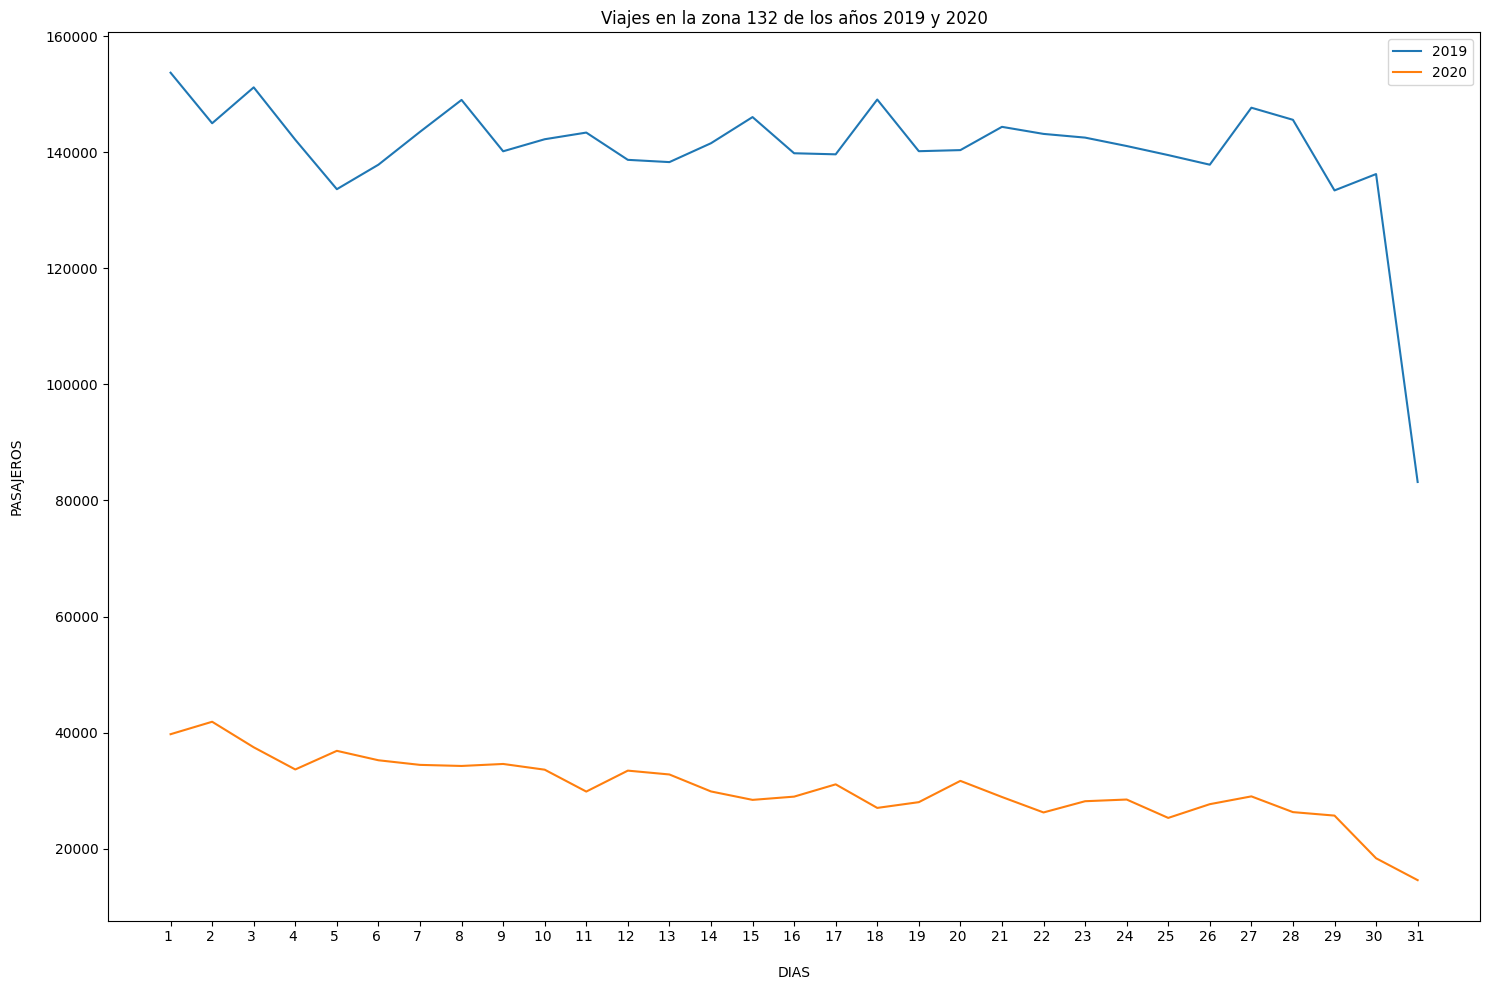

In [241]:
x_label = [f"{i} " for i in range(1, 32)]
# hace una grafica mas detallada con valores mas grandes
plt.figure(figsize=(15, 10))
plt.plot(x_label, gby_2019, label="2019")
plt.plot(x_label, gby_2020, label="2020")
plt.xlabel("\nDIAS")
plt.ylabel("PASAJEROS\n")
plt.legend()
plt.title("Viajes en la zona 132 de los años 2019 y 2020")

plt.tight_layout()
plt.show()

## 3.5 Análisis de zonas (1.5 puntos)

Usando los datos de ambos años conteste las siguientes preguntas.

**a)** ¿Cuál es la zona que tuvo la mayor reducción de pasajeros diarios entre abril de 2019 y abril de 2020? (0.3 puntos)

In [246]:
filter_abril_2019 = df_2019.loc[(df_2019["tpep_pickup_datetime"].dt.month == 4)]
gby_2019 = filter_abril_2019.groupby(["PULocationID"])["passenger_count"].sum().reset_index()
filter_abril_2020 = df_2020.loc[(df_2020["tpep_pickup_datetime"].dt.month == 4)]
gby_2020 = filter_abril_2020.groupby(["PULocationID"])["passenger_count"].sum().reset_index()


In [247]:
df = pd.merge(gby_2019, gby_2020, on="PULocationID", how="inner")
df["diff"] = df["passenger_count_x"] - df["passenger_count_y"]
df.sort_values(by="diff", ascending=False).head(10)


,PULocationID,passenger_count_x,passenger_count_y,diff
148,161,502907.0,3677.0,499230.0
221,237,508039.0,8825.0,499214.0
220,236,461976.0,11450.0,450526.0
149,162,421220.0,6014.0,415206.0
214,230,411996.0,3150.0,408846.0
173,186,395692.0,7937.0,387755.0
119,132,375221.0,2052.0,373169.0
43,48,369395.0,10127.0,359268.0
218,234,355508.0,4750.0,350758.0
129,142,348882.0,9518.0,339364.0


La mayor diferencia de pasajeros diarios entre abril de 2019 y abril de 2020 fue en la zona 161, con una diferencia de 499.230 de pasajeros.

**b)** ¿Cuál es la zona que tuvo la menor reducción de pasajeros diarios entre abril de 2019 y abril de 2020? (0.2 puntos)

In [249]:
df = pd.merge(gby_2019, gby_2020, on="PULocationID", how="inner")
df["diff"] = df["passenger_count_x"] - df["passenger_count_y"]
df.sort_values(by="diff", ascending=False).head(20)

,PULocationID,passenger_count_x,passenger_count_y,diff
148,161,502907.0,3677.0,499230.0
221,237,508039.0,8825.0,499214.0
220,236,461976.0,11450.0,450526.0
149,162,421220.0,6014.0,415206.0
214,230,411996.0,3150.0,408846.0
173,186,395692.0,7937.0,387755.0
119,132,375221.0,2052.0,373169.0
43,48,369395.0,10127.0,359268.0
218,234,355508.0,4750.0,350758.0
129,142,348882.0,9518.0,339364.0


La menor reduccion de pasajeros se dio en la zona 172, con una diferencia de 1 pasajero.

**c)** En la página de NYC, descargue el archivo "Taxi Zone Shapefile" que contiene el mapa con las zonas de NYC. Genere una imagen con el mapa de NYC en que las zonas tengan un color dependiendo de la reducción de pasajeros entre abril de 2019 y 2020. (1.0 puntos)

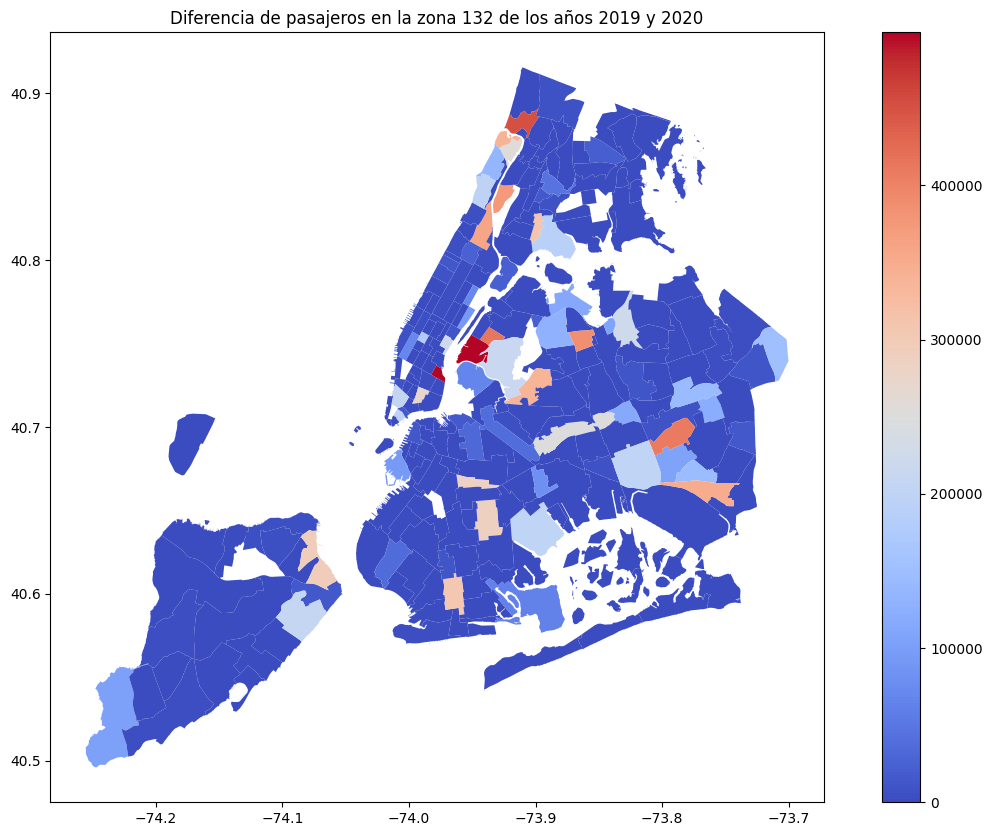

In [235]:
read_geomap = gpd.read_file("data/NYC Taxi Zones.zip")
# agregar los colores en base a la columna diff del dataframe df
read_geomap["color"] = df["diff"]
# graficar el mapa
read_geomap.plot(column="color", cmap="coolwarm", legend=True, figsize=(15, 10))
plt.title("Diferencia de pasajeros en la zona 132 de los años 2019 y 2020")
plt.show()
